<h1>A large travel agency has asked us to predict whether a flight will be canceled based on several factors. The agency can sell tickets for only three airlines (AA, UA, and DL) and would like to be able to advise its customers on which airline has the least risk of cancellation. Using the dataset provided:</h1>

In [1]:
#Import all the required libraries
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import math
warnings.filterwarnings("ignore")

In [3]:
#we will create relative path to get data from csv files
import os
path = os.getcwd()+"\\flights.csv"
df = pd.read_csv(path, low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_dec = df[df['MONTH']==10]
df_dec.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385712,2015,10,1,4,AA,1230,N3DBAA,14747,11298,5,...,543.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385713,2015,10,1,4,DL,1805,N696DL,14771,13487,5,...,528.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385714,2015,10,1,4,NK,612,N602NK,12889,13487,5,...,448.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385715,2015,10,1,4,AA,260,N3GNAA,12892,13303,10,...,813.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385716,2015,10,1,4,AA,1982,N914UY,14771,11057,10,...,750.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#General Info
number_of_delayed = df_dec["DEPARTURE_DELAY"].apply(lambda s: 1 if s!=0 else 0);
print("Total number of flights: "+str(len(df_dec)))
print("Number of cancelled flights: "+str(sum(df_dec["CANCELLED"])))
print("Number of delayed flights: "+str(sum(number_of_delayed)))


Total number of flights: 486165
Number of cancelled flights: 2454
Number of delayed flights: 456430


In [64]:
print(df.shape)


(5819079, 31)


In [65]:
import operator
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16,  10)

In [66]:
airline_path = os.getcwd()+"\\airlines.csv"
airport_path = os.getcwd()+"\\airports.csv"
airlines_data = pd.read_csv(airline_path)
airports_data = pd.read_csv(airport_path)

In [67]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [68]:
airports_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [69]:
#We will make a copy of flights dataframe into other dataframe and reduce the size of data by slicing it
df_two = df.copy()
flight_data = df_two[:461502]
flight_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Now that we've imported the dataset, we want to drop rows that won't be important to our model. The first columns I want to drop are cancellation reason and all the delay reason columns. I don't want to drop the 'cancelled' column because I may have further use for it.

Next, I want to drop all of the columns related to information we won't have before a ticket could be purchased (not including the columns we may use for a target variable).

Finally, I want to drop the FLIGHT_NUMBER and TAIL_NUMBER variables as they are categorical variables with a LOT of categories and I don't think they're going to have much of an impact on our model.

In [70]:
#Let us drop the columns that we don't require while applying algorithm
colsToDrop0 = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                      'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
colsToDrop1 = ['TAXI_OUT', 'WHEELS_OFF', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME']
colsToDrop2 = ['FLIGHT_NUMBER', 'TAIL_NUMBER','YEAR']
df.drop(colsToDrop0, axis=1, inplace=True)
df.drop(colsToDrop1, axis=1, inplace=True)
df.drop(colsToDrop2, axis=1, inplace=True)
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,1448,430,-22.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,2330,750,-9.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,2296,806,5.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,2342,805,-9.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,1448,320,-21.0,0,0


In [71]:
def get_hour(x):
    try: # If departure time has >2 digits 
        return int(str(x)[:-2])
    except: # if departure time has only <=2 digits: the hour is 0, time is 0:xx
        return 0
    
df['Hour']= df['DEPARTURE_TIME'].apply(get_hour)

In [72]:
df.head()
#df.info()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,Hour
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,1448,430,-22.0,0,0,2354
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,2330,750,-9.0,0,0,2
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,2296,806,5.0,0,0,18
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,2342,805,-9.0,0,0,15
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,1448,320,-21.0,0,0,24


In [73]:
#To get the hour from Departure Delay for analysis
def get_correctHour(x):
    if(len(str(x))==4):
        return int(str(x)[:2])
    elif(len(str(x))==3):
        return int(str(x)[:1])
    elif(len(str(x))==2 and x>23 and x<60):
        return 0
    elif(len(str(x))==2 and x>59 and x<90):
        return 1
    elif(len(str(x))==2 and x>89 and x<100):
        return 2
    else:
        return x
        
df['HOUR']= df['Hour'].apply(get_correctHour)        

In [74]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,Hour,HOUR
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,1448,430,-22.0,0,0,2354,23
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,2330,750,-9.0,0,0,2,2
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,2296,806,5.0,0,0,18,18
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,2342,805,-9.0,0,0,15,15
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,1448,320,-21.0,0,0,24,0


There's an issue with the ORIGIN_AIRPORT and DESTINATION_AIRPORT features for October 2015. The problem is described in this post on Kaggle. The approach to fix it is drawn from this Kaggle kernel.

In [75]:
df[df['MONTH']==10].head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,Hour,HOUR
4385712,10,1,4,AA,14747,11298,5,15.0,10.0,237.0,208.0,1660,602,-19.0,0,0,15,15
4385713,10,1,4,DL,14771,13487,5,16.0,11.0,213.0,192.0,1589,538,-10.0,0,0,16,16
4385714,10,1,4,NK,12889,13487,5,2400.0,-5.0,177.0,168.0,1299,502,-14.0,0,0,2400,24
4385715,10,1,4,AA,12892,13303,10,7.0,-3.0,296.0,306.0,2342,806,7.0,0,0,7,7
4385716,10,1,4,AA,14771,11057,10,8.0,-2.0,291.0,282.0,2296,801,-11.0,0,0,8,8


In [76]:
##In this section we will try and fix the discrepancy in the ORIGIN_AIRPORT AND DESTINATION_AIRPORT for the month of October

path2 = os.getcwd()+"\L_AIRPORT.csv" #This is the lookup file provided by dat.gov website having 3-Letter codes for airport 
df_threeLetterCode = pd.read_csv(path2)
path3 = os.getcwd()+"\L_AIRPORT_ID.csv" #This is the lookup file provided by dat.gov website having 5-digit codes for airport
df_fiveDigitCode = pd.read_csv(path3)

codesToDrop = ['BSM','NYL']
df_threeLetterCode = df_threeLetterCode[~df_threeLetterCode['Code'].isin(codesToDrop)]
threeLetterCodes = list(df_threeLetterCode['Code'])
df2 = df_threeLetterCode.set_index('Description')
df3 = df_fiveDigitCode.set_index('Code')

df_airports = df[['ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
df_October = df_airports.loc[~df_airports['ORIGIN_AIRPORT'].isin(threeLetterCodes) |
                            ~df_airports['DESTINATION_AIRPORT'].isin(threeLetterCodes)]

def fixOctoberAirports(airport):
    if len(airport) != 3:
        index = int(airport)
        descriptionAsKey = df3.loc[index]['Description']
        newCode = df2.loc[descriptionAsKey]['Code']
        return newCode
    else:
        return airport
    
print("Fixing Origin_Airport")
fixed_origin_airport = df['ORIGIN_AIRPORT'].apply(fixOctoberAirports)
fixed_origin_airport_fly = flight_data['ORIGIN_AIRPORT'].apply(fixOctoberAirports)

print("Fixing Dest_Airport")
fixed_dest_airport = df['DESTINATION_AIRPORT'].apply(fixOctoberAirports)
fixed_dest_airport_fly = flight_data['DESTINATION_AIRPORT'].apply(fixOctoberAirports)


df['ORIGIN_AIRPORT'] = fixed_origin_airport
df['DESTINATION_AIRPORT'] = fixed_dest_airport
flight_data['ORIGIN_AIRPORT'] = fixed_origin_airport_fly
flight_data['DESTINATION_AIRPORT'] = fixed_dest_airport_fly
 

df[df['MONTH']==10].head()

Fixing Origin_Airport
Fixing Dest_Airport


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,Hour,HOUR
4385712,10,1,4,AA,SEA,DFW,5,15.0,10.0,237.0,208.0,1660,602,-19.0,0,0,15,15
4385713,10,1,4,DL,SFO,MSP,5,16.0,11.0,213.0,192.0,1589,538,-10.0,0,0,16,16
4385714,10,1,4,NK,LAS,MSP,5,2400.0,-5.0,177.0,168.0,1299,502,-14.0,0,0,2400,24
4385715,10,1,4,AA,LAX,MIA,10,7.0,-3.0,296.0,306.0,2342,806,7.0,0,0,7,7
4385716,10,1,4,AA,SFO,CLT,10,8.0,-2.0,291.0,282.0,2296,801,-11.0,0,0,8,8


In [80]:
flight_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In general, we are going to use these columns to study flights using their delation,cancellation,cancellation reasons,time,speed,and changing direction(divert).

Using the previous properties, we are going to help the passengers to choose the best airline to travel.

In [77]:
flights_data.columns.values

array(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Unnamed: 27', 'ORIGIN_AIRPORT_NAME',
       'ON_TIME'], dtype=object)

flights_data does not contain the namd of airline (just contains the unique identifier) so we are going to add new column AIRLINE_NAME to flight_data from airlines_data.

In [78]:
#General Info
number_of_delayed = flights_data["DEP_DELAY"].apply(lambda s: 1 if s!=0 else 0);
print("Total number of flights: "+str(len(flights_data)))
print("Number of cancelled flights: "+str(sum(flights_data["CANCELLED"])))
print("Number of delayed flights: "+str(sum(number_of_delayed)))


print("Number of not cancelled flights: "+str(len(flights_data)-sum(flights_data["CANCELLED"])))
print("Number of not delayed flights: "+str(len(flights_data)-sum(number_of_delayed)))
# print("The number of missing data: "+str(flights_data['DEPARTURE_TIME'].isnull().sum()));
print("Percentage of cancelled flights: "+str((sum(flights_data["CANCELLED"])*1.0/len(flights_data))*100)+"%")
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(flights_data))*100)+"%")

Total number of flights: 469968
Number of cancelled flights: 11982.0
Number of delayed flights: 445683
Number of not cancelled flights: 457986.0
Number of not delayed flights: 24285
Percentage of cancelled flights: 2.54953528751%
Percentage of delayed flights: 94.8326269023%


In [81]:
#We will try and match the Origin Airport for all Carrier which will give us from where it operates using a lambda func
flight_data["AIRLINE_NAME"]=flight_data.apply(lambda x: airlines_data.loc[airlines_data['IATA_CODE'] == x["AIRLINE"],"AIRLINE"].values[0],axis=1)

In [83]:
flight_data[["AIRLINE_NAME","AIRLINE","ORIGIN_AIRPORT"]].head()

,AIRLINE_NAME,AIRLINE,ORIGIN_AIRPORT
0,Alaska Airlines Inc.,AS,ANC
1,American Airlines Inc.,AA,LAX
2,US Airways Inc.,US,SFO
3,American Airlines Inc.,AA,LAX
4,Alaska Airlines Inc.,AS,SEA


In [86]:
flight_data["ORIGIN_AIRPORT_NAME"]=flight_data.apply(lambda x: airports_data.loc[airports_data['IATA_CODE'] == x["ORIGIN_AIRPORT"],"AIRPORT"].values[0],axis=1)

In [87]:
flight_data[["AIRLINE_NAME","ORIGIN_AIRPORT","ORIGIN_AIRPORT_NAME"]].head()

,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_AIRPORT_NAME
0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport
1,American Airlines Inc.,LAX,Los Angeles International Airport
2,US Airways Inc.,SFO,San Francisco International Airport
3,American Airlines Inc.,LAX,Los Angeles International Airport
4,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport


In [84]:
def get_airline_information(column_name,airline_dataframe,flight_dataframe):
    return airline_dataframe.apply(lambda x: flight_dataframe.loc[x["IATA_CODE"]==flight_dataframe["AIRLINE"],column_name].values[0] if len(flight_dataframe.loc[x["IATA_CODE"]==flight_dataframe["AIRLINE"],column_name])>0 else 0,axis=1)

In [89]:
#We will check if any columns have missing values
flight_data["ON_TIME"]=flight_data["ARRIVAL_DELAY"].apply(lambda row: 1 if row==0 else 0)
print(len(flight_data["AIRLINE_DELAY"]))
print("ON_TIME: "+str(flight_data["ON_TIME"].sum()))
missing_data_info={};
for column in flight_data.columns:
    missing_data_info[column]=flight_data[column].isnull().sum()
missing_data_info_sorted = sorted(missing_data_info.items(), key=operator.itemgetter(1))
missing_data_info_sorted

461502
ON_TIME: 9941


[('DAY', 0),
 ('ORIGIN_AIRPORT', 0),
 ('YEAR', 0),
 ('DIVERTED', 0),
 ('DAY_OF_WEEK', 0),
 ('SCHEDULED_ARRIVAL', 0),
 ('SCHEDULED_TIME', 0),
 ('SCHEDULED_DEPARTURE', 0),
 ('DISTANCE', 0),
 ('DESTINATION_AIRPORT', 0),
 ('MONTH', 0),
 ('AIRLINE_NAME', 0),
 ('ON_TIME', 0),
 ('ORIGIN_AIRPORT_NAME', 0),
 ('CANCELLED', 0),
 ('AIRLINE', 0),
 ('FLIGHT_NUMBER', 0),
 ('TAIL_NUMBER', 2763),
 ('DEPARTURE_TIME', 11555),
 ('DEPARTURE_DELAY', 11555),
 ('TAXI_OUT', 11772),
 ('WHEELS_OFF', 11772),
 ('WHEELS_ON', 12150),
 ('ARRIVAL_TIME', 12150),
 ('TAXI_IN', 12150),
 ('AIR_TIME', 12827),
 ('ELAPSED_TIME', 12827),
 ('ARRIVAL_DELAY', 12827),
 ('AIRLINE_DELAY', 366524),
 ('SECURITY_DELAY', 366524),
 ('LATE_AIRCRAFT_DELAY', 366524),
 ('AIR_SYSTEM_DELAY', 366524),
 ('WEATHER_DELAY', 366524),
 ('CANCELLATION_REASON', 449627)]

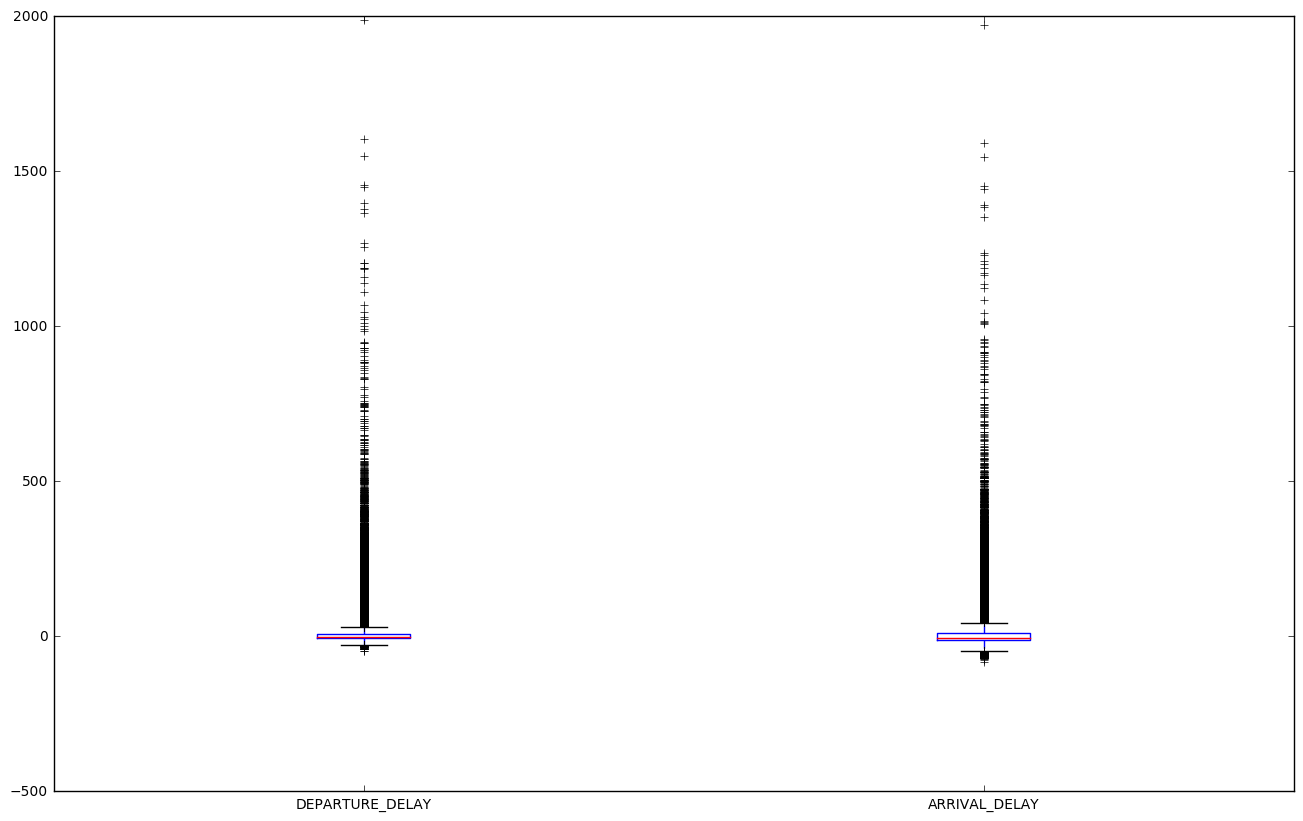

In [90]:
flight_data[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].plot.box()

We notice from the previous plot that there are some negative values and that means there are some flights took off before few minutes before the exact time. We are going to call that flights ahead_flights and the other one delayed_flights

In [91]:
cancelled_flights = flight_data
grouped_cancelled_flights=cancelled_flights[["AIRLINE","AIRLINE_NAME","CANCELLED","ON_TIME"]].groupby(['AIRLINE','AIRLINE_NAME']).sum().reset_index()
grouped_cancelled_flights["FLIGHTS_COUNT"]=cancelled_flights[["AIRLINE","AIRLINE_NAME","ON_TIME"]].groupby(['AIRLINE','AIRLINE_NAME']).count().reset_index()["ON_TIME"]
grouped_cancelled_flights["CANCELLED_PERCENTAGE"]=grouped_cancelled_flights["CANCELLED"]*1.0/grouped_cancelled_flights["FLIGHTS_COUNT"]*100
grouped_cancelled_flights["ON_TIME_PERCENTAGE"]=grouped_cancelled_flights["ON_TIME"]*1.0/grouped_cancelled_flights["FLIGHTS_COUNT"]*100
grouped_cancelled_flights[["AIRLINE","AIRLINE_NAME","FLIGHTS_COUNT","CANCELLED","ON_TIME","CANCELLED_PERCENTAGE","ON_TIME_PERCENTAGE"]].sort_values(by=['CANCELLED_PERCENTAGE'],ascending=[False])

,AIRLINE,AIRLINE_NAME,FLIGHTS_COUNT,CANCELLED,ON_TIME,CANCELLED_PERCENTAGE,ON_TIME_PERCENTAGE
7,MQ,American Eagle Airlines Inc.,29359,2271,564,7.735277,1.921046
2,B6,JetBlue Airways,21175,1097,450,5.180638,2.125148
4,EV,Atlantic Southeast Airlines,49182,1696,1109,3.448416,2.254890
11,US,US Airways Inc.,32857,953,740,2.900447,2.252184
9,OO,Skywest Airlines Inc.,47232,1244,1046,2.633808,2.214600
10,UA,United Air Lines Inc.,37780,954,754,2.525146,1.995765
0,AA,American Airlines Inc.,43157,883,939,2.046018,2.175777
13,WN,Southwest Airlines Co.,98152,1743,2168,1.775817,2.208819
12,VX,Virgin America,4659,80,117,1.717107,2.511269
5,F9,Frontier Airlines Inc.,6713,89,162,1.325786,2.413228


In [93]:
airlines_data["FLIGHTS_COUNT"]=get_airline_information("FLIGHTS_COUNT",airlines_data,grouped_cancelled_flights)
airlines_data["ON_TIME"]=get_airline_information("ON_TIME",airlines_data,grouped_cancelled_flights)
airlines_data["ON_TIME_PERCENTAGE"]=get_airline_information("ON_TIME_PERCENTAGE",airlines_data,grouped_cancelled_flights)
airlines_data.sort_values(by="ON_TIME_PERCENTAGE",ascending=False)

,IATA_CODE,AIRLINE,FLIGHTS_COUNT,ON_TIME,ON_TIME_PERCENTAGE
11,HA,Hawaiian Airlines Inc.,6290,282,4.483307
13,VX,Virgin America,4659,117,2.511269
6,AS,Alaska Airlines Inc.,12971,319,2.459332
3,F9,Frontier Airlines Inc.,6713,162,2.413228
10,EV,Atlantic Southeast Airlines,49182,1109,2.254890
2,US,US Airways Inc.,32857,740,2.252184
5,OO,Skywest Airlines Inc.,47232,1046,2.214600
8,WN,Southwest Airlines Co.,98152,2168,2.208819
1,AA,American Airlines Inc.,43157,939,2.175777
4,B6,JetBlue Airways,21175,450,2.125148


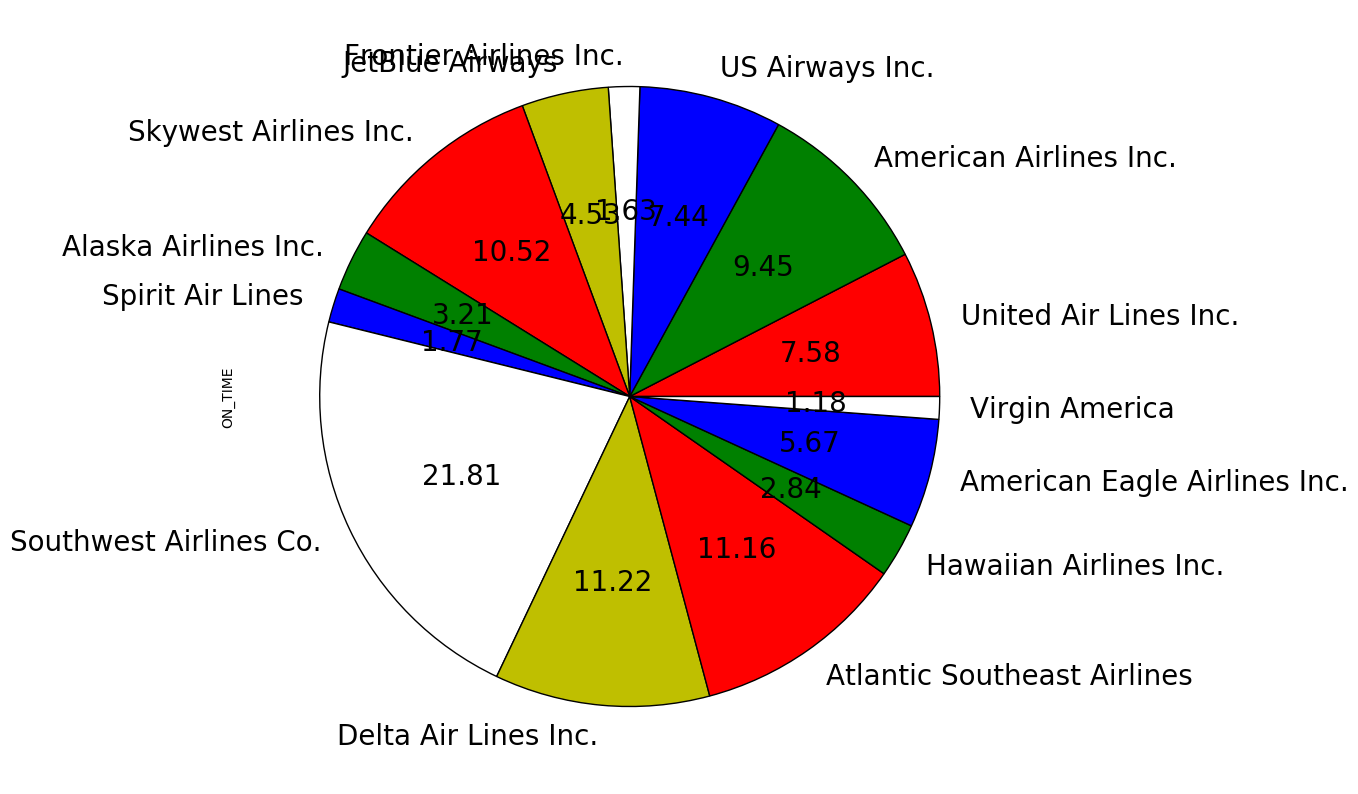

In [94]:
#Let us plot a pier chart which will give us the Carrier with most OnTIME performance

airlines_data["ON_TIME"].plot.pie(labels=airlines_data["AIRLINE"],autopct='%.2f', fontsize=20, figsize=(10, 10),colors=['r','g','b','w','y'])

In [96]:
#Delay by Airlines
positive_delayed_flight=flight_data
positive_delayed_flight=positive_delayed_flight[positive_delayed_flight['DEPARTURE_DELAY']>=0]
positive_delayed_flight_grouped=positive_delayed_flight[["AIRLINE","AIRLINE_NAME","DEPARTURE_DELAY"]].groupby(["AIRLINE",'AIRLINE_NAME']).mean().reset_index()

In [97]:
#In tabular form for all the carrier with thier ON-Time performance and Mean Delay
airlines_data["MEAN_DEPARTURE_DELAY"]=get_airline_information("DEPARTURE_DELAY",airlines_data,positive_delayed_flight_grouped)
airlines_data[["AIRLINE","ON_TIME_PERCENTAGE","MEAN_DEPARTURE_DELAY"]].sort_values(by="MEAN_DEPARTURE_DELAY",ascending=True).head()

,AIRLINE,ON_TIME_PERCENTAGE,MEAN_DEPARTURE_DELAY
11,Hawaiian Airlines Inc.,4.483307,15.852388
9,Delta Air Lines Inc.,1.757954,21.794828
8,Southwest Airlines Co.,2.208819,22.469839
2,US Airways Inc.,2.252184,23.847958
13,Virgin America,2.511269,24.995087


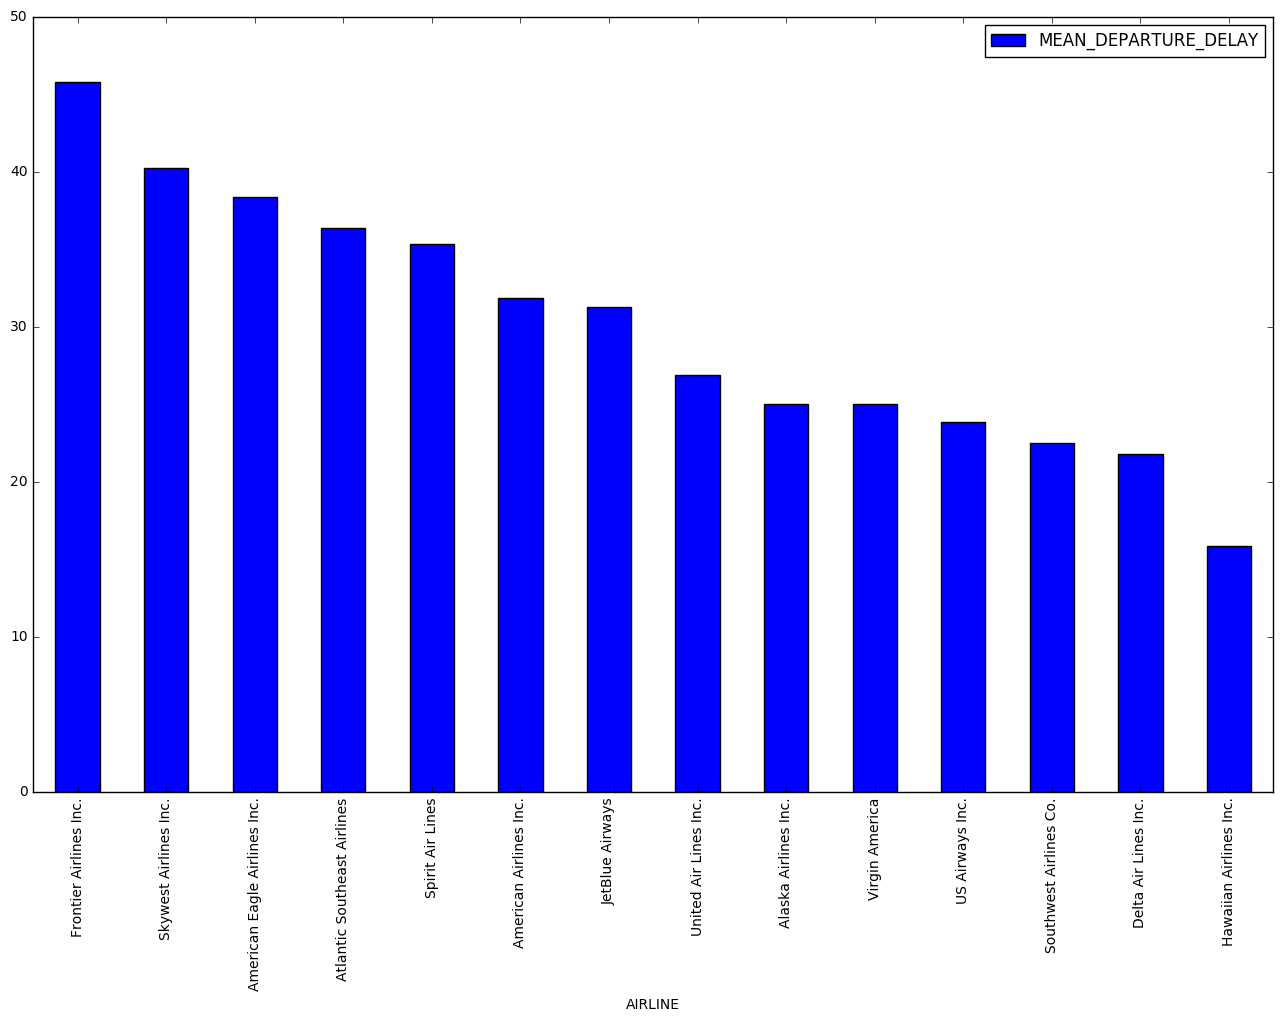

In [98]:
#Mean delay for each airlines
airlines_data.sort_values(by=["MEAN_DEPARTURE_DELAY"],ascending=False).plot(x="AIRLINE",y="MEAN_DEPARTURE_DELAY",kind='bar')

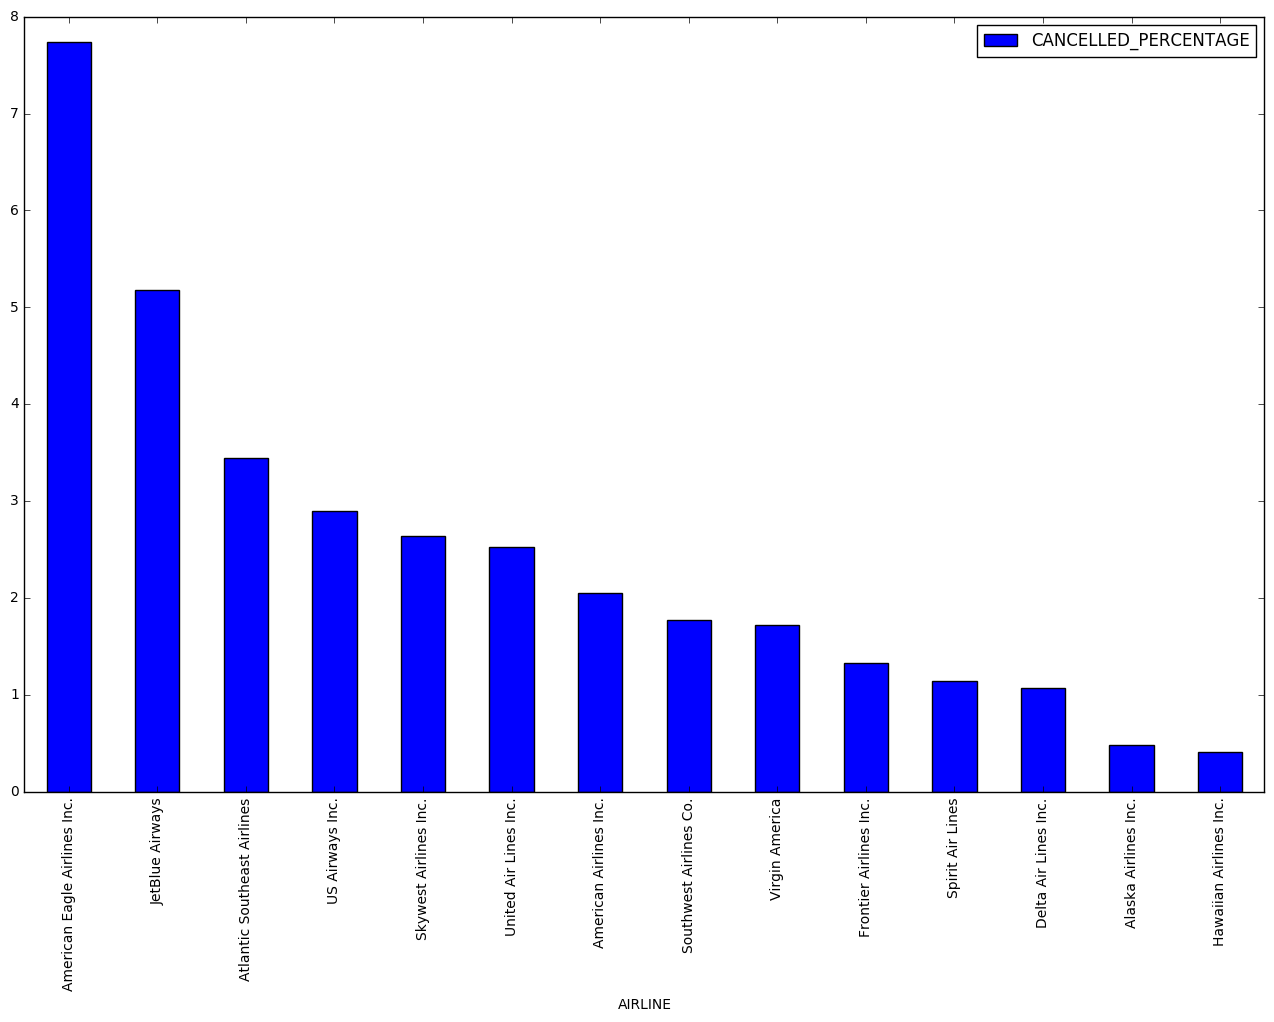

In [99]:
#Ranking according to cancellation percentage
airlines_data["CANCELLED_PERCENTAGE"]=get_airline_information("CANCELLED_PERCENTAGE",airlines_data,grouped_cancelled_flights)
airlines_data.sort_values(by=["CANCELLED_PERCENTAGE"],ascending=False).plot(x="AIRLINE",y="CANCELLED_PERCENTAGE",kind='bar')

In [12]:
#Now we will try to clean the data to apply algorithn
missing_values = df.isnull().sum(axis=0)
missing_values

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
ELAPSED_TIME           105071
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
Hour                        0
HOUR                        0
dtype: int64

In [13]:
df['CANCELLED'].value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [14]:
df['DIVERTED'].value_counts()

0    5803892
1      15187
Name: DIVERTED, dtype: int64

In [15]:
#Find num diverted or cancelled
print("Total number of flights diverted or cancelled: ", (89884 + 15187))

Total number of flights diverted or cancelled:  105071


Total number of flights diverted or cancelled: 105071 As you can see in the cells above, the number of missing values in the ARRIVAL_DELAY column directly matches the number of flights diverted/cancelled. There are no other missing values, so we'll proceed with our analysis.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

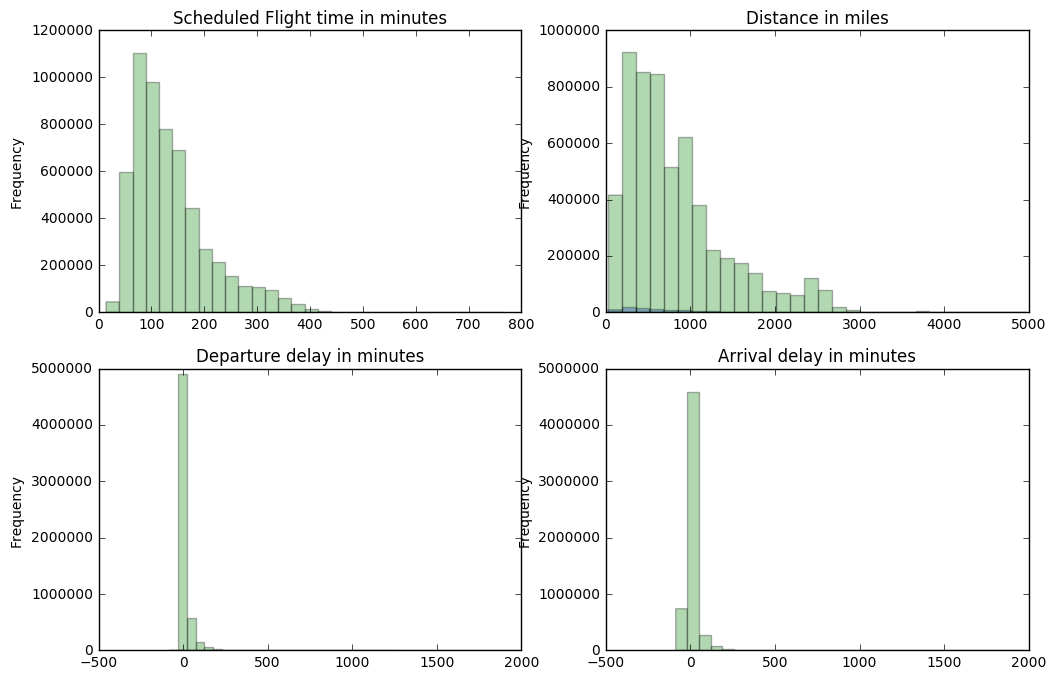

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

df.loc[df['CANCELLED']==1 ,'ELAPSED_TIME'].plot.hist(bins= 30, ax=axes[0,0], alpha=.3, title= 'Scheduled Flight time in minutes')
df.loc[df['CANCELLED']==0 ,'ELAPSED_TIME'].plot.hist( bins= 30, ax=axes[0,0], alpha=.3)

df.loc[df['CANCELLED']==1 ,'DISTANCE'].plot.hist(bins= 30, ax=axes[0,1], alpha=.3, title= 'Distance in miles')
df.loc[df['CANCELLED']==0 ,'DISTANCE'].plot.hist(bins= 30, ax=axes[0,1], alpha=.3 )

df.loc[df['CANCELLED']==1 ,'ARRIVAL_DELAY'].plot.hist(bins= 30, ax=axes[1,1], alpha=.3, title= 'Arrival delay in minutes')
df.loc[df['CANCELLED']==0 ,'ARRIVAL_DELAY'].plot.hist(bins= 30, ax=axes[1,1], alpha=.3 )

df.loc[df['CANCELLED']==1 ,'DEPARTURE_DELAY'].plot.hist(bins= 40, ax=axes[1,0], alpha=.3, title= 'Departure delay in minutes' )
df.loc[df['CANCELLED']==0 ,'DEPARTURE_DELAY'].plot.hist(bins= 40, ax=axes[1,0], alpha=.3  )

In [18]:
df.groupby(['CANCELLED','AIRLINE']).size().unstack()

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
CANCELLED,,,,,,,,,,,,,,
0,715065,171852,262772,872057,556746,90248,76101,279607,115375,578393,509150,194648,61369,1245812
1,10919,669,4276,3824,15231,588,171,15025,2004,9960,6573,4067,534,16043


In [19]:
cancel_by_month = df.groupby(['CANCELLED','MONTH']).size().unstack()
cancel_by_month

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
CANCELLED,,,,,,,,,,,,
0,457986,408674,493310,480631,491299,494777,515912,505484,462871,483711,463373,471167
1,11982,20517,11002,4520,5694,9120,4806,5052,2075,2454,4599,8063


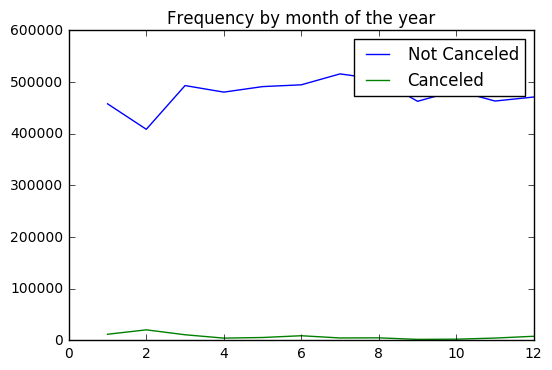

In [20]:
#To compare cancelled and not cancelled flight we will compare using a line chart
plt.plot(cancel_by_month.iloc[0], label= 'Not Canceled')
plt.plot(cancel_by_month.iloc[1], label= 'Canceled')
plt.legend(loc=1)
plt.title('Frequency by month of the year')

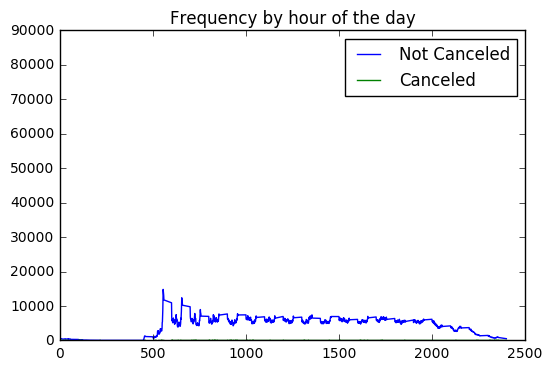

In [21]:
cancel_by_hour= df.groupby(['CANCELLED','Hour']).size().unstack()
plt.plot(cancel_by_hour.iloc[0], label= 'Not Canceled')
plt.plot(cancel_by_hour.iloc[1], label= 'Canceled')
plt.legend(loc=1)
plt.title('Frequency by hour of the day')

In [26]:
#We will import all the libraries required to apply certain algorithms
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import base
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [27]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, categorical_variables, numeric_variables): 
        # parameters taken by the transformer: a list of categorical_variables, a list of numeric_variables
        self.categorical_variables = categorical_variables  # We will need these in transform()
        self.numeric_variables     = numeric_variables
    
    def fit(self, X, y=None):
        # Create empty list to store encode fit
        self.label_encode = [] 
        self.OneHot_encode = []
        
        # fit LabelEncoder and OneHotEncoder to data
        for i, column in enumerate(self.categorical_variables):
            LE = LabelEncoder()                 # encode categorical variables as numeric
            OHE = OneHotEncoder( sparse=False)  # do one hot encoding
            OHE.fit(LE.fit_transform( X[column]).reshape(-1,1))
            self.label_encode.append( LE )    
            self.OneHot_encode.append( OHE )  
        return self
    
    def transform(self, X):
        X = X.reset_index() 
        df_cat = []  # empty list to store transformation result for each categorical variable
        
        # use LabelEncoder and OneHotEncoder to transform data
        for i, column in enumerate(self.categorical_variables):
            df_feature = self.OneHot_encode[i].transform(self.label_encode[i].transform( X[column]).reshape(-1,1))
            df_feature = pd.DataFrame(df_feature)
            df_feature.columns = [column  +'_'+str(x) for x in list(self.label_encode[i].classes_)]
            df_cat.append(df_feature)
            
        # Merge these dummary variables with numeric features: 
        df_numeric = X[self.numeric_variables]
        X = pd.concat([df_numeric]+ df_cat, axis=1) 
        
        return X

In [30]:
#We will drop the unnecessary columns
colsToDrop3 = ['DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
              'DIVERTED','SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_TIME']
df.drop(colsToDrop3, axis=1, inplace=True)
df.head()

,MONTH,AIRLINE,DEPARTURE_TIME,ELAPSED_TIME,DISTANCE,ARRIVAL_DELAY,CANCELLED,Hour,HOUR
0,1,AS,2354.0,194.0,1448,-22.0,0,2354,23
1,1,AA,2.0,279.0,2330,-9.0,0,2,2
2,1,US,18.0,293.0,2296,5.0,0,18,18
3,1,AA,15.0,281.0,2342,-9.0,0,15,15
4,1,AS,24.0,215.0,1448,-21.0,0,24,0


In [49]:
#We will limit the data to top ailine carrier
#colsToDrop4 = ['Hour']
#df.drop(colsToDrop4, axis=1, inplace=True)
airline_List = ['AA', 'UA', 'B6', 'AS', 'WN', 'DL']
airline_List
df1 = df[df['AIRLINE'] == 'AA']
df2 = df[df['AIRLINE'] == 'UA']
df3 = df[df['AIRLINE'] == 'B6']
df4 = df[df['AIRLINE'] == 'AS']
df5 = df[df['AIRLINE'] == 'WN']
df6 = df[df['AIRLINE'] == 'DL']
frames = [df1,df2,df3,df4,df5,df6]
df_concat = pd.concat(frames)

In [52]:
#We will transform the rows into columns
CT = ColumnSelectTransformer(categorical_variables=['AIRLINE','MONTH', 'HOUR'], 
                                numeric_variables=['DISTANCE'])
df_feature = CT.fit_transform(df_concat)
columns = list(df_feature.columns)
print(columns)
df_feature.head()

['DISTANCE', 'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_UA', 'AIRLINE_WN', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12', 'HOUR_0', 'HOUR_1', 'HOUR_2', 'HOUR_3', 'HOUR_4', 'HOUR_5', 'HOUR_6', 'HOUR_7', 'HOUR_8', 'HOUR_9', 'HOUR_10', 'HOUR_11', 'HOUR_12', 'HOUR_13', 'HOUR_14', 'HOUR_15', 'HOUR_16', 'HOUR_17', 'HOUR_18', 'HOUR_19', 'HOUR_20', 'HOUR_21', 'HOUR_22', 'HOUR_23', 'HOUR_24']


,DISTANCE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_UA,AIRLINE_WN,MONTH_1,MONTH_2,MONTH_3,...,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,HOUR_24
0,2330,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2342,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1464,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2174,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2724,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [55]:
#We will use the train_test_split to split the data into test and train datasets
X =  df_concat.drop('CANCELLED', axis=1)
y = df_concat['CANCELLED']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 1000, random_state=42)

Random Forest classifier can be used for both classification and regression tasks. Overfitting is one critical problem that may make the results worse, but for Random Forest algorithm, if there are enough trees in the forest, the classifier won’t overfit the model. The third advantage is the classifier of Random Forest can handle missing values, and the last advantage is that the Random Forest classifier can be modeled for categorical values.

In [58]:
#max_depth= 10, n_estimators = 10, max_features= 10
# name -> (line format, classifier)
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

CLASS_MAP ={'Random Forest': (':', RandomForestClassifier(min_samples_split=20)),}

for name, (line_fmt, clf) in CLASS_MAP.items():
    # train model
    model = Pipeline([
        ('ColSelect', CT ),# ColumnSelectTransformer
        ('clf', clf)       # classifier
    ])
    
    model.fit( X_train, y_train)
    # predict probability on test data
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:, 1])
    
    # Calcualte FPR, TPR for plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    auc_score = auc(fpr, tpr)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(name + ': Train Accuracy', accuracy_score(y_train, train_pred) , #sum(train_pred== y_train)/len(y_train),
          ', Test Accuracy', accuracy_score(y_test, test_pred))

    #print('Confusion matrix of train data:')
    #print(confusion_matrix(y_train, train_pred))
    print('Confusion matrix of test data:')
    print(confusion_matrix(y_test, test_pred))

Random Forest: Train Accuracy 0.998738348648 , Test Accuracy 0.999
Confusion matrix of test data:
[[985   1]
 [  0  14]]


<h1>I choose random forest classifier to be the final prediction model. This final model is very good but that's the best model using current features</h1>

In [60]:
from sklearn.pipeline import Pipeline
CT = ColumnSelectTransformer(categorical_variables=['AIRLINE','MONTH', 'HOUR'], 
                                numeric_variables=['DISTANCE'])
#clf = LogisticRegression()
clf = RandomForestClassifier(min_samples_split=20)
pipe = Pipeline([
        ('ColSelect', CT ),# ColumnSelectTransformer
        ('clf', clf)       # classifier
    ])

pipe.fit(df_concat, df_concat['CANCELLED'])

Pipeline(steps=[('ColSelect', ColumnSelectTransformer(categorical_variables=['AIRLINE', 'MONTH', 'HOUR'],
            numeric_variables=['DISTANCE'])), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
   ...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [61]:
pipe.named_steps['clf'].feature_importances_

array([  1.22942014e-01,   2.08119214e-03,   2.79842669e-03,
         1.36140145e-03,   7.25876770e-03,   2.03722665e-03,
         1.25556121e-02,   3.64545677e-03,   7.54560965e-03,
         2.00685888e-03,   4.49276401e-04,   5.50479084e-04,
         6.75680041e-04,   1.78341882e-03,   1.18709054e-03,
         1.07735169e-03,   5.44430720e-04,   4.98388358e-04,
         8.30403509e-04,   8.19321883e-01,   1.19055338e-05,
         1.55111329e-05,   1.28977830e-05,   1.88698122e-06,
         1.16455150e-04,   4.67689623e-04,   7.38118913e-04,
         7.35256828e-04,   4.05090359e-04,   5.17989479e-04,
         8.19467321e-04,   7.96890537e-04,   3.12622027e-04,
         2.53867772e-04,   7.24550702e-04,   3.14459254e-04,
         7.82568385e-04,   6.17009757e-04,   3.16971981e-04,
         2.30099203e-04,   3.54409415e-04,   1.81652701e-04,
         1.21189531e-04,   4.71758081e-07])

In [62]:
importance = pipe.named_steps['clf'].feature_importances_
importance = pd.DataFrame(importance, index= columns, columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in clf.estimators_], axis=0)

importance

,Importance,Std
DISTANCE,1.229420e-01,7.580722e-03
AIRLINE_AA,2.081192e-03,1.054013e-03
AIRLINE_AS,2.798427e-03,1.545825e-03
AIRLINE_B6,1.361401e-03,4.624478e-04
AIRLINE_DL,7.258768e-03,5.441345e-03
AIRLINE_UA,2.037227e-03,1.263888e-03
AIRLINE_WN,1.255561e-02,5.222681e-03
MONTH_1,3.645457e-03,1.821443e-03
MONTH_2,7.545610e-03,3.069075e-03
MONTH_3,2.006859e-03,9.454744e-04


<h3>Use the model output to predict whether a future flight will be canceled.</h3>

In [65]:
# Randomly sample 10 rows from data for test prediction
test_num = 10
test = df_concat.sample(test_num )
test.head()

,MONTH,AIRLINE,DEPARTURE_TIME,ELAPSED_TIME,DISTANCE,ARRIVAL_DELAY,CANCELLED,HOUR
293026,1,AA,853.0,368.0,2486,5.0,0,8
5000568,11,WN,733.0,63.0,304,-9.0,0,7
1325006,3,WN,730.0,65.0,239,5.0,0,7
2640922,6,UA,857.0,55.0,200,-21.0,0,8
4043785,9,UA,557.0,363.0,2586,-19.0,0,5


In [69]:
c = df_concat.groupby(['AIRLINE', 'CANCELLED']).size().unstack()
c['proportion'] = c[1]/(c[0]+ c[1])
c

CANCELLED,0,1,proportion
AIRLINE,,,
AA,715065,10919,0.015040
AS,171852,669,0.003878
B6,262772,4276,0.016012
DL,872057,3824,0.004366
UA,509150,6573,0.012745
WN,1245812,16043,0.012714


<h1>Alaska Airlines has the lowest probability of cancelled flight</h1>

In [70]:
grp  =  df_concat[['CANCELLED', 'AIRLINE','MONTH']].groupby(['MONTH','AIRLINE' ])
m = grp.agg({'mean', 'count'}).unstack()
m

CANCELLED                                                          \
            count                                          mean             
AIRLINE        AA     AS     B6     DL     UA      WN        AA        AS   
MONTH                                                                       
1           44059  13257  21623  64421  38395  100042  0.020427  0.004828   
2           39835  12194  19751  60884  36235   90172  0.064114  0.009267   
3           45966  14276  22590  74166  43603  109245  0.031066  0.002732   
4           44770  13974  22020  72170  41342  106407  0.007907  0.004651   
5           44710  14682  22565  74815  44411  107702  0.019772  0.003065   
6           44360  15075  22558  77255  46084  109776  0.012151  0.003980   
7           81434  15821  24029  80741  46478  113650  0.006901  0.003097   
8           79748  16095  23826  80947  45413  108179  0.009906  0.002237   
9           73379  14271  21133  72063  41778  100645  0.004811  0.001822   
10          77290  14467  21913  75552  45894  104516  0.009380  0.002281   
11          73871  13950  21697  72228  42647  104045  0.007472  0.003297   
12          76562  14459  23343  70639  43443  107476  0.016692  0.006432   

                                                 
                                                 
AIRLINE        B6        DL        UA        WN  
MONTH                                            
1        0.050964  0.010525  0.025186  0.017663  
2        0.065617  0.027856  0.027763  0.038305  
3        0.020274  0.007065  0.014701  0.019662  
4        0.006312  0.002037  0.008950  0.005836  
5        0.007622  0.001911  0.007836  0.009062  
6        0.010240  0.003094  0.023978  0.017162  
7        0.009364  0.001313  0.010069  0.007382  
8        0.010703  0.000852  0.007509  0.009762  
9        0.004259  0.000083  0.002537  0.003815  
10       0.005933  0.000225  0.002789  0.003081  
11       0.005162  0.000194  0.007199  0.009323  
12       0.002827  0.002619  0.018093  0.015092

 Alsaska Airlines(AS) is also the carrier with lowest probabilities of canceled flight by month

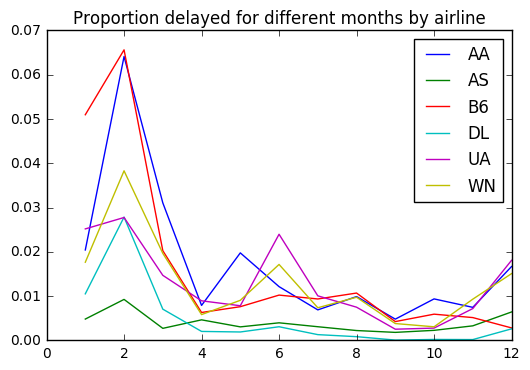

In [73]:
#To graphically represent our result we will plot it on a graph
plt.plot( m['CANCELLED']['mean']['AA'], label='AA')
plt.plot( m['CANCELLED']['mean']['AS'], label='AS')
plt.plot( m['CANCELLED']['mean']['B6'], label='B6')
plt.plot( m['CANCELLED']['mean']['DL'], label='DL')
plt.plot( m['CANCELLED']['mean']['UA'], label='UA')
plt.plot( m['CANCELLED']['mean']['WN'], label='WN')
plt.legend(loc=1)
plt.title('Proportion delayed for different months by airline')

In [74]:
grp_h  =  df_concat[['CANCELLED', 'AIRLINE','HOUR']].groupby(['HOUR','AIRLINE' ])
h = grp_h.agg({'mean', 'count'}).unstack()
h

CANCELLED                                                         \
            count                                                   mean   
AIRLINE        AA       AS       B6       DL       UA       WN        AA   
HOUR                                                                       
0         13522.0   1578.0   5334.0   6939.0   8478.0  16400.0  0.768230   
1          1984.0    958.0    886.0   1058.0   1277.0    422.0  0.000504   
2           307.0    463.0    485.0    205.0    528.0     88.0  0.003257   
3           147.0     41.0    703.0    102.0    254.0     45.0  0.006803   
4          4382.0    560.0    786.0    410.0    351.0     84.0  0.000685   
5         23657.0   4556.0   8890.0  28058.0  16904.0  47613.0  0.000507   
6         43232.0  14075.0  17731.0  53251.0  32145.0  86845.0  0.000532   
7         56783.0  11089.0  17142.0  53172.0  34104.0  69454.0  0.000475   
8         42477.0  10053.0  15176.0  59820.0  36012.0  79442.0  0.000659   
9         40007.0  11009.0  14629.0  53842.0  32491.0  70415.0  0.000550   
10        42424.0  11482.0  14837.0  49875.0  29329.0  80684.0  0.000684   
11        43575.0   9551.0  16503.0  56674.0  29940.0  72602.0  0.000643   
12        43530.0   8164.0  12040.0  55988.0  30504.0  72297.0  0.000896   
13        42959.0   9419.0  14015.0  51735.0  30765.0  74199.0  0.000629   
14        41870.0   8152.0  14635.0  47222.0  25977.0  70820.0  0.000645   
15        41022.0   8249.0  14237.0  55839.0  30318.0  73033.0  0.000609   
16        39289.0   7979.0  13307.0  52969.0  26113.0  71495.0  0.000636   
17        42875.0  11242.0  14396.0  56753.0  34502.0  75311.0  0.001073   
18        45921.0  13083.0  15717.0  37449.0  25050.0  76651.0  0.000566   
19        33207.0  10216.0  16208.0  56529.0  31706.0  72250.0  0.000873   
20        36689.0   6398.0  15196.0  33011.0  19388.0  65495.0  0.001118   
21        21120.0   6753.0  10853.0  31230.0  16445.0  49914.0  0.001515   
22        17951.0   3397.0   6773.0  23407.0  14848.0  29947.0  0.001560   
23         6924.0   4044.0   6463.0  10264.0   8294.0   6292.0  0.001589   
24          130.0     10.0    106.0     79.0      NaN     57.0  0.000000   

                                                           
                                                           
AIRLINE        AS        B6        DL        UA        WN  
HOUR                                                       
0        0.387199  0.788901  0.533794  0.730597  0.959024  
1        0.000000  0.002257  0.000945  0.005482  0.004739  
2        0.000000  0.002062  0.009756  0.001894  0.000000  
3        0.000000  0.000000  0.009804  0.000000  0.000000  
4        0.000000  0.000000  0.000000  0.000000  0.000000  
5        0.000439  0.000225  0.000036  0.000296  0.000273  
6        0.000782  0.000226  0.000075  0.000404  0.000253  
7        0.000180  0.000117  0.000094  0.000528  0.000230  
8        0.000099  0.000264  0.000084  0.000389  0.000063  
9        0.000091  0.000205  0.000056  0.000492  0.000114  
10       0.000348  0.000472  0.000281  0.000477  0.000161  
11       0.000733  0.000485  0.000141  0.000334  0.000152  
12       0.000490  0.000332  0.000107  0.000623  0.000138  
13       0.000319  0.000143  0.000251  0.000520  0.000135  
14       0.000245  0.000273  0.000212  0.000924  0.000198  
15       0.000849  0.000351  0.000072  0.000627  0.000164  
16       0.000376  0.000225  0.000132  0.000766  0.000168  
17       0.000178  0.000000  0.000106  0.000696  0.000226  
18       0.000153  0.000127  0.000160  0.001198  0.000248  
19       0.000196  0.000000  0.000177  0.001041  0.000318  
20       0.000313  0.000197  0.000091  0.001857  0.000366  
21       0.000444  0.000369  0.000128  0.001277  0.000861  
22       0.000000  0.000443  0.000214  0.001616  0.000868  
23       0.000000  0.000619  0.000195  0.001809  0.002384  
24       0.000000  0.009434  0.000000       NaN  0.000000

<h1>Conclusion: The agency should advise its customers that Alaska airline has the least risk of cancellation</h1>